\newpage

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.


## Assignment Standards

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. 
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.

-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf)。 Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 



## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).



### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

In [2]:
# package
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

1. The classification problem based on the dataset is using classification algorithms to predict wheather a person have chronic kidney disease based on various medical indicators and test results.

We need to use classification algorithms to divided the data into those who have chronic kidney disease (CKD) and those who do not have (non-CKD).

We can use feature such as blood pressure, serum creatinine, hemoglobin levels, glucose, and so on.

The target variable is the binary variable class, which include the infomation of ckd or not ckd.

In [17]:
# import data
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

## 3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [18]:
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [19]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [20]:
X.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no


In [21]:
y.head()


,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd


In [22]:
# Summary statistics
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [23]:
# Check for missing values
print(X.isnull().sum())

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [24]:
print(y.isnull().sum())

class    0
dtype: int64


In [25]:
# Observation counts
print(f'Total observations: {X.shape[0]}')
print(f'Total features: {X.shape[1]}')

Total observations: 400
Total features: 24


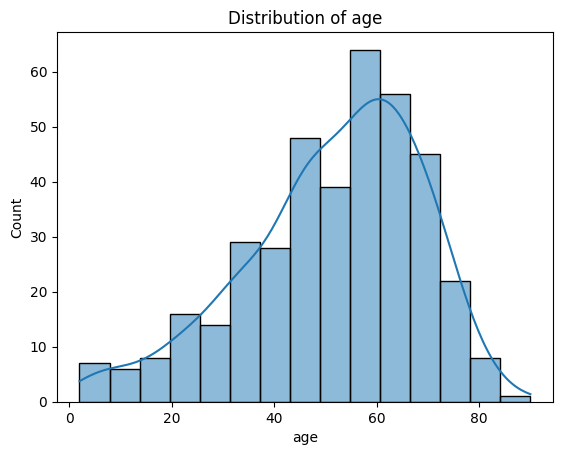

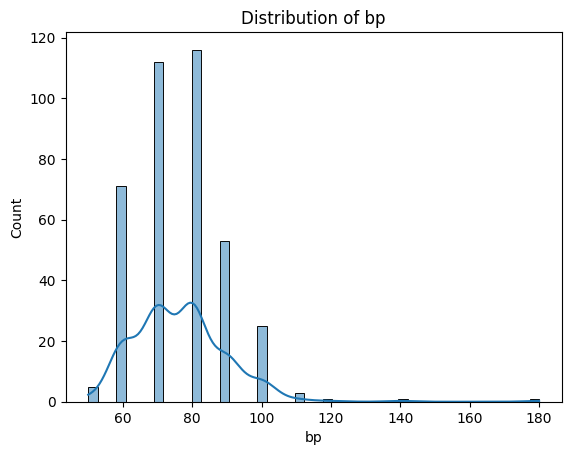

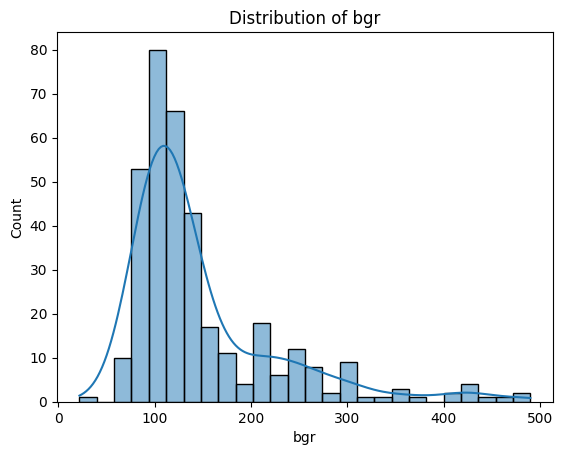

In [11]:
for col in ['age', 'bp', 'bgr']:
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

The dataset contains both numerical (float64) and categorical (object) variables

Some variable have lots of missing value, notably presenting in rbc with 152 missing entries, wbcc with 106, and rbcc with 131.

From Summary Statistics, we found some numarical variable have a large range, for example age cover from 2 to 90 years, and bgr cover from 22 to 490. We can also find there are some outliers(for example from bgr, bu, and sc) which are far away from the 75th percentile might indicating some healthy issue.

From the distribution plot, we found the distribution of age has a slight left-skew and distribution of bgr is right-skewed. Which indicating we might need to do the log transformation. 

## 2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

2.

In [ ]:
# Check skewness of numerical variables
numerical_features = X.select_dtypes(include=[np.number]).columns
skewness = X[numerical_features].skew().sort_values(ascending=False)

# Apply log transformation to highly skewed variables
for feature in skewness.index:
    if abs(skewness[feature]) > 1: 
        X[feature + '_log'] = np.log1p(X[feature])

## 15. **Team Contributions:** Document each team member's specific contributions related to the questions above.

15.
Jiawei Li:
- Create git repo
- Codeing and analysis for question: 1,2,3
- Fixing and improveing for question: 

Name:
- Codeing and analysis for question:
- Fixing and improveing for question: 
-

Name:
- Codeing and analysis for question:
- Fixing and improveing for question: 
-

## 16. **Link** to the public GitHub repository.

\newpage

## Reference(MLA8 formate)

“UCI Machine Learning Repository.” Archive.ics.uci.edu, archive.ics.uci.edu/dataset/336/chronic+kidney+disease.



\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**
